In [1]:
#This graph show the order of the customer named "John doe" to find the relationship of that customer 
#and medication that he ordered.
#Vertices: Each vertex in the graph represents a medication ordered by the customer and is labeled with its category.
#Edges: There is an undirected edge between two vertices if the corresponding medications belong to the same category.
#Associated values: There are no weights or distances with the vertices or edges.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
order_db = pd.read_csv("Order.csv")

In [4]:
def load_customer_order(orderDb, customer_name:str) -> list():
    return orderDb.loc[orderDb['Customer Name'] == customer_name].values

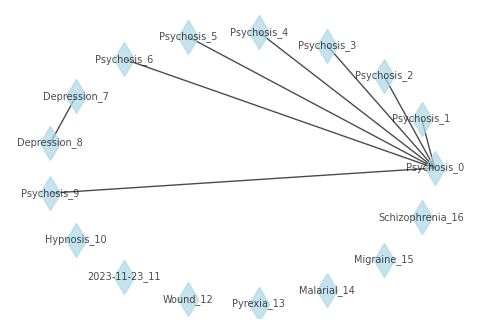

In [5]:
G = nx.Graph()
medications = load_customer_order(order_db, "John Doe")
category_nodes = {}
for i, med in enumerate(medications):
    name, category = med[1], med[2]
    if category not in category_nodes:
        category_nodes[category] = []
    node_id = f"{category}_{i}"
    G.add_node(node_id, label=category)
    category_nodes[category].append(node_id)
connected_categories = set()
for i, med in enumerate(medications):
    name, category = med[1], med[2]
    if category not in connected_categories:
        node_ids = [node_id for node_id in category_nodes[category] if node_id != f"{category}_{i}"]
        for other_node_id in node_ids:
            G.add_edge(f"{category}_{i}", other_node_id)
        connected_categories.add(category)
pos = nx.circular_layout(G)
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)

nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', font_size=7, width=1, alpha=0.7, node_shape="d", ax=ax)
plt.show()


In [6]:
#In this graph you can see that he ordered 8 medication of psychosis and 2 medication of depression 1 for wound, migraine
#, Hypnosis, Malarial category.

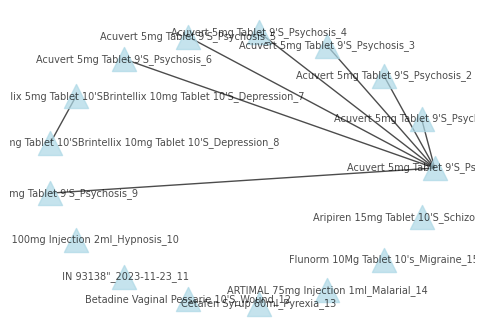

In [7]:
G1 = nx.Graph()
for i, med in enumerate(medications):
    name, category = med[1], med[2]
    node_id = f"{name}_{category}_{i}"
    G1.add_node(node_id, label=category)

connected_categories = set()
for i, med in enumerate(medications):
    name, category = med[1], med[2]
    if category not in connected_categories:
        node_id = f"{name}_{category}_{i}"
        for j, other_med in enumerate(medications[i+1:], start=i+1):
            other_name, other_category = other_med[1], other_med[2]
            if category == other_category:
                other_node_id = f"{other_name}_{other_category}_{j}"
                G1.add_edge(node_id, other_node_id)
        connected_categories.add(category)

pos = nx.circular_layout(G1)
fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1)

nx.draw(G1, pos, with_labels=True, node_color='lightblue', edge_color='black', font_size=7, width=1, alpha=0.7, node_shape="^", ax=ax)
# add edge labels with distance between nodes
edge_labels = nx.get_edge_attributes(G1, 'distance')
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels, font_size=6, label_pos=0.5, ax=ax)

plt.show()


In [8]:
#And this show the medication name according to the category of the medication that he ordered in the first graph.